# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$

We will in this chapter show how we would implement arrays using the numpy python module. 

In [1]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE: you'll need this later

x1 = [1, 2, 3]
x2 = [4, 2, 1]
x3 = [3, 8 ,5]
x4 = [-9, -1, 0]

# Creating nested array
X = np.array([x1, x2, x3, x4])

print(f"{X}")

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Norms, metrics or distances

#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

In this exercise we will show how to use the norms L1 and L2 for vectors using python, and it's `math` module. When we have written our L1 and L2 functions we are going to use the assert given in the assignment to validate the final outcome of the arrays. 

In [2]:
import math

def CheckArraySizeCoantainsElements(X):
    assert X.shape[0]>=0 
    if not X.ndim==1:
        raise Exception("Array not bigger than 1 dimension") 

def L2(X):
    CheckArraySizeCoantainsElements(X)
    s = 0
    for i in range(X.size): 
        s = s + X[i] * X[i] 
    return s**(1/2)

def L1(X):
    CheckArraySizeCoantainsElements(X)
    return sum((i**2)**0.5 for i in X) 
  
# Using dot and sqrrrrt the real python way
def L2Dot(X):
    return np.sqrt(np.dot(X,X))

    
# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot - expected_d2) < eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## The cost function, $J$

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

In this exercise we will show how we implement the RMSE function by using the $\bX$ matrix and $\by$ from exercise Qa. We are going to use the dummy function H to use the first column as $\bX$ predictions. 

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

In [3]:
from math import fabs

# Define the root mean square error function using the L2 norm defined earlier
def RMSE(y_pred, y_true):
    # Check if y_pred and y_true have the same shape
    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays y_pred and y_true must have the same shape.")
    return L2(y_pred - y_true)/2

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls our RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

Since we already created a RMSE function in a previous exercise. We are also going to create a function MAE to calculate the norm of L1 instead of L2 

In [4]:
# Define the mean absolute error function using the L1 norm defined earlier
def MAE(y_pred, y_true):
    # Check if y_pred and y_true have the same shape
    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays y_pred and y_true must have the same shape.")
    return L1(y_pred - y_true)/y_pred.size

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


## Pythonic Code

### Robustness of Code

#### Qe Robust Code 

We have to add error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

### Qf Conclusion

In conclusion, going through the exercises for the supervised data-flow model in Python has provided valuable insights into its implementation using matrices and vectors. We have computed the cost function, RMSE (Root Mean Square Error), and applied two different norms - L1 (Euclidean) and L2 (Box-City) - to evaluate the loss/cost of the model aka how bad it is compared to the true value. Low number is good, high number is bad.

Through these exercises, we have learned that linear algebra is important in understanding and optimizing supervised learning algorithms. 

The fundamental concepts are essential for anyone working with machine learning and data science, as they form the basis for building robust and accurate predictive models. 

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

#### Qa Load and display the MNIST data

In this exercise we are going to be using the `fetch_openml` function to import the MNIST data which is needed. `fetch_openml` can be imported through the module `sklearn.datasets`  

Lenght of samples:  70000
Label for digit:  4


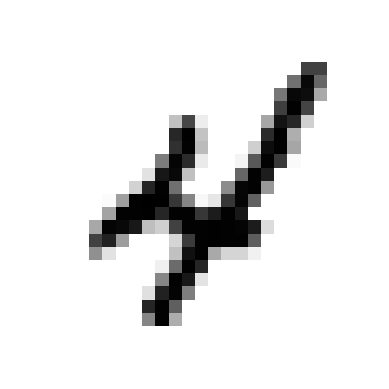

In [5]:
from sklearn.datasets import fetch_openml

# Get data set 
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False, parser = 'auto')
    X = X / 255.
    return X,y

# Plot the digit
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X,y = MNIST_GetDataSet()

X = X / 255.

print("Lenght of samples: ", len(X))
print("Label for digit: ", y[9])

digits_to_plot = X[9]

MNIST_PlotDigit(digits_to_plot)

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

In this exercise we are going to create a test-train scenario for our MNIST dataset. We are also going to use the `SGDClassifier` to add a stochastic gradient decent, to help fitting our dataset. 

X.shape=(70000, 784)
X.shape=(70000, 784)
Predicted Label: False


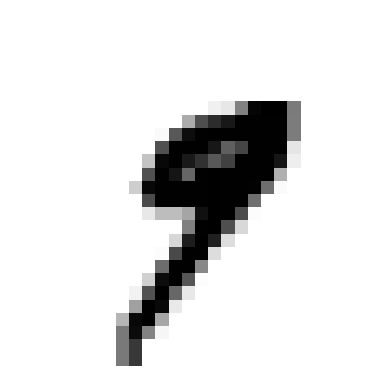

Predicted Label: False


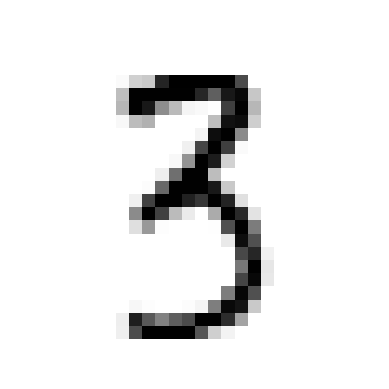

Predicted Label: False


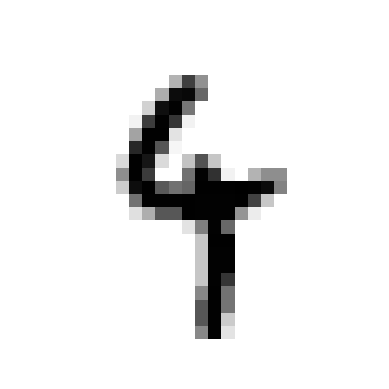

In [7]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

# X is reshaped to an 2D array if not already
def reshape_X(X):
    if X.ndim==3:
        X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    return X

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
X = reshape_X(X)
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create binary classifier for the target y_train_5 with 5 as the true digit
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

# Create SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train using training data
sgd_clf.fit(X_train, y_train_5)

# Predict using test data
y_pred = sgd_clf.predict(X_test)

# Plot numbers that have been categorized correctly
correct = np.where(y_pred == y_test_5)[0]

for number in correct[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()
    

Predicted Label: False


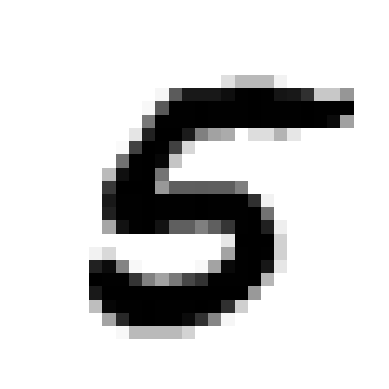

Predicted Label: False


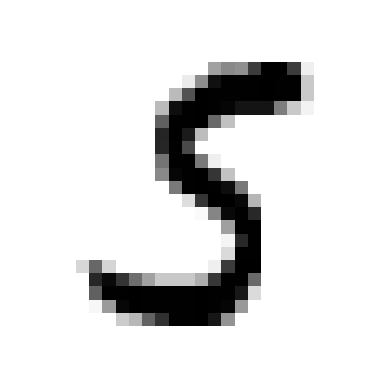

Predicted Label: False


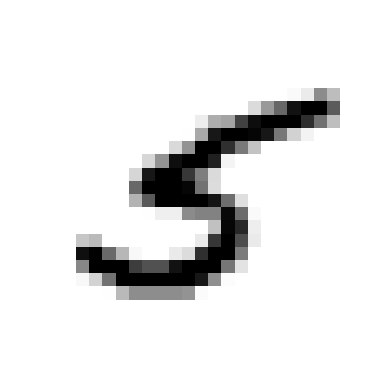

In [9]:
misclassified_number = np.where(y_pred != y_test_5)[0]
classified_number = np.where(y_pred == y_test_5)[0]

# Plot numbers that have been categorized correctly
for number in misclassified_number[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()

#### Qc Implement a dummy binary classifier

In this exercise we will create a dummy binary classifier, that can classify every image class given. In this exercise is going to be given all the non-5's. 

In [14]:
from sklearn.metrics import accuracy_score

class DummyClassifier():
    def __init__(self):
        self.classes_ = None
        self.dummy_class_ = None

    def fit(self, X, y=None):
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))
        return self
    
    def predict(self, X):
        return np.full(X.shape[0], fill_value=self.dummy_class_)
    
dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train, y_train_5)
y_pred = dummyClassifier.predict(X_train)

print(f"Any digit is a 5: {any(y_pred)}")
print(f"Accuracy score: {accuracy_score(y_train_5, y_pred)}")


Any digit is a 5: False
Accuracy score: 0.9095535714285714


### Qd Conclusion
In the exercise, we employed the SGDClassifier to train our MNIST dataset. 
The results of the exercise reveal that our training and testing phases yielded both accurate and inaccurate 
predictions. 
Evaluating the classifier's performance presents a challenge. 
Notably, our DummyClassifier achieved a 90% accuracy score by simply classifying every digit as non-5, since the
majority of digits in the dataset are indeed non-5 (constituting 90% of the data). 
However, this accuracy score fails to provide an accurate assessment of our model's fitness for the task at hand.
 
Consequently, we can infer that relying solely on accuracy as a performance metric is not advisable, particularly
when dealing with classifiers and datasets where certain classes are significantly more prevalent than others.

# SWMAL Exercise


## Performance Metrics

#### Qa Implement the Accuracy function and test it on the MNIST data.

We are going to be creating a function called `PredictAccuracy`. This function will be used to give feedback to use on how many elements were predicted right.  

In [3]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

# Get data set 
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False, parser = 'auto')
    X = X / 255.
    return X,y

X,y = MNIST_GetDataSet()
X = X / 255.

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create binary classifier for the target y_train_5 with 5 as the true digit
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

# Create SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train using training data
sgd_clf.fit(X_train, y_train_5)

# Predict using test data
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import accuracy_score

class DummyClassifier():
    def __init__(self):
        self.classes_ = None
        self.dummy_class_ = None

    def fit(self, X, y=None):
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))
        return self
    
    def predict(self, X):
        return np.full(X.shape[0], fill_value=self.dummy_class_)
    
dummyClassifier = DummyClassifier()
dummyClassifier.fit(X_train, y_train_5)
y_pred_dummy = dummyClassifier.predict(X_train)


In [6]:
from sklearn.metrics import accuracy_score

def predictAccuracy(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return 0
    y_pred_correct=[]
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            y_pred_correct.append(y_pred[i])
    return len(y_pred_correct)/len(y_true)
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def testAccuracy(y_true, y_pred):
    a0=predictAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

print("\nTestAccuracy() simple example:")
testAccuracy([1,2,3,4], [1,2,3,3])

print("\nTestAccuracy() on sdg:")
testAccuracy(y_test_5, y_pred)
print("\nTestAccuracy() on dummy:")
testAccuracy(y_train_5, y_pred_dummy)



TestAccuracy() simple example:

my a          =0.75
scikit-learn a=0.75

TestAccuracy() on sdg:

my a          =0.9117142857142857
scikit-learn a=0.9117142857142857

TestAccuracy() on dummy:

my a          =0.9093392857142857
scikit-learn a=0.9093392857142857


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In the following exercise we are going to be implementing a function called `myPrecision`. This function is going to give us an idea of how precise our predictions were.  

In [8]:
import sklearn.metrics as metrics

def myPrecision(y_true, y_pred):
    pcp = [item for item in y_pred if item == True]
    if len(pcp)==0:
        return 0
    y_predCorrect=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_predCorrect.append(y_pred[i])
    return len(y_predCorrect)/len(pcp)

def myPrecision_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    precision=myPrecision(y_true, y_pred)
    precision_scikit=metrics.precision_score(y_true, y_pred, zero_division = 0.0)

    print(f"\nprecision = {precision}")
    print(f"precision_scikit = {precision_scikit}")

print("\nMyPrecision_Test() simple example:")
myPrecision_Test([True,True,False,True], [True,True,True,False])
print("\nMyPrecision_Test() on y_pred:")
myPrecision_Test(y_test_5, y_pred)
print("\nMyPrecision_Test() on y_pred_dummy:")
myPrecision_Test(y_train_5, y_pred_dummy)

def myRecall(y_true, y_pred):
     #condition positive
    cp = [item for item in y_true if item == True]
    y_predCorrect=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_predCorrect.append(y_pred[i])
    return len(y_predCorrect)/len(cp)

def myRecall_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    recall=myRecall(y_true, y_pred)
    recall_scikit=metrics.recall_score(y_true, y_pred)

    print(f"\nrecall = {recall}")
    print(f"recall_scikit = {recall_scikit}")

print("\nMyRecall_Test() usage example:")
myRecall_Test([True,True,True,True], [True,True,True,False])
print("\nMyRecall_Test() on y_pred:")
myRecall_Test(y_test_5, y_pred)
print("\nMyRecall_Test() on y_pred_dummy:")
myRecall_Test(y_train_5, y_pred_dummy)

def myF1Score(y_true, y_pred):
    p = myPrecision(y_true, y_pred)
    r = myRecall(y_true, y_pred)
    if p==0 or r==0:
        return 0
    return 2/((1/p)+(1/r))

def f1Score_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f1Score=myF1Score(y_true, y_pred)
    f1Score_scikit=metrics.f1_score(y_true, y_pred)

    print(f"\nf1Score = {f1Score}")
    print(f"f1Score_scikit={f1Score_scikit}")

print("\nF1Score_Test() simple example:")
f1Score_Test([True,True,False,True], [True,False,True,False])
print("\nF1Score_Test() on y_pred:")
f1Score_Test(y_test_5, y_pred)
print("\nF1Score_Test() on y_pred_dummy:")
f1Score_Test(y_train_5, y_pred_dummy)


MyPrecision_Test() simple example:

precision = 0.6666666666666666
precision_scikit = 0.6666666666666666

MyPrecision_Test() on y_pred:

precision = 0
precision_scikit = 0.0

MyPrecision_Test() on y_pred_dummy:

precision = 0
precision_scikit = 0.0

MyRecall_Test() usage example:

recall = 0.75
recall_scikit = 0.75

MyRecall_Test() on y_pred:

recall = 0.0
recall_scikit = 0.0

MyRecall_Test() on y_pred_dummy:

recall = 0.0
recall_scikit = 0.0

F1Score_Test() simple example:

f1Score = 0.4
f1Score_scikit=0.4

F1Score_Test() on y_pred:

f1Score = 0
f1Score_scikit=0.0

F1Score_Test() on y_pred_dummy:

f1Score = 0
f1Score_scikit=0.0


#### Qc The Confusion Matrix

In this exercise we are going to be creating 3 confusion matrices. We are creating oen for each of the `sdg`'s and one for the dummy. 

In [10]:
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(y_test_5, y_pred)
cm_sdg_reversed = confusion_matrix(y_pred, y_test_5)
cm_dummy = confusion_matrix(y_train_5, y_pred_dummy)

print(f"sdg: \n{cm_sdg}\n")
print(f"dummy: \n{cm_dummy}\n")
print(f"sdg reversed: \n{cm_sdg_reversed}\n")

sdg: 
[[12764     0]
 [ 1236     0]]

dummy: 
[[50923     0]
 [ 5077     0]]

sdg reversed: 
[[12764  1236]
 [    0     0]]


#### Qd A Confusion Matrix Heat-map

We will in this exercise use python to create heat-maps for the confusion matrices from exercise Qc.

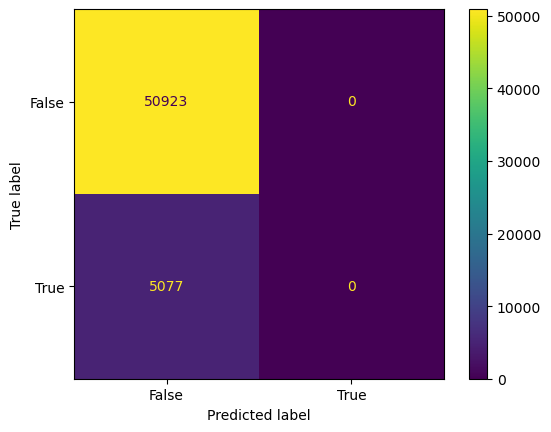

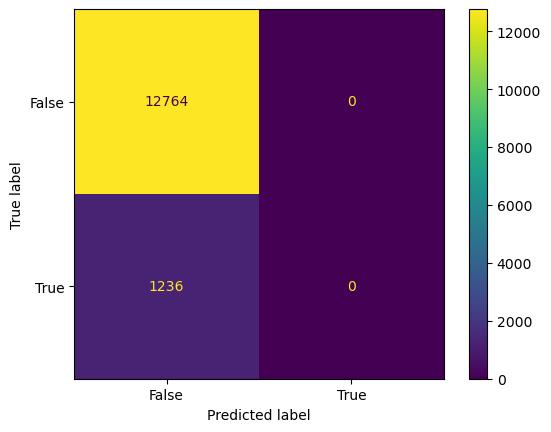

In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10) 
ConfusionMatrixDisplay.from_predictions(y_train_5,y_pred_dummy) 
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred)
plt.show()

### Qe Conclusion
In this exercise, we did an evaluation of classification algorithms using custom Python metrics as well as the functions provided by scikit-learn.
The primary objective of this exercise was to emphasize the significance of utilizing specific metrics when evaluating your algorithm, as the choice of metrics should align with the particular use case. For instance, in the context of identifying criminals, prioritizing high precision is crucial, while for disease detection, a high recall or sensitivity is more pertinent. Additionally, the F1-score proves useful when you need to strike a balance between true positives and true negatives, making it especially relevant, as seen in the "is this a 5?" algorithm. Consequently, the F1-score offers a more precise assessment of the utility of both the SGD algorithm and the Dummy classifier, with their respective accuracy rates of approximately 75% and 0%.

Moreover, we employed confusion matrices and heatmaps to gain in-depth insights into the performance of these classifiers, providing a visually informative component to complement the quantitative metrics.